In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
  !pip install shap
  !pip install hvplot holoviews
  !pip install pandas_ta
  !pip install -U imbalanced-learn

# Reading **Auction** Data

In [ ]:
auction = pd.read_csv('all_sold_player_auction_2023_espn.csv',  encoding='windows-1252')
auction.head(5)

,team,base_price,id,name,overseas,retained,role,sold_price,team_id
0,GT,NaN,1048739,R Sai Kishore,0,1,bowler,30000000,6904
1,KKR,2000000.0,1048813,Narayan Jagadeesan,0,0,batsman,9000000,4341
2,RCB,2000000.0,1048867,Sonu Yadav,0,0,all-rounder,2000000,4340
3,RCB,2000000.0,1057399,Manoj Bhandage,0,0,all-rounder,2000000,4340
4,CSK,2000000.0,1059570,Ajay Mandal,0,0,all-rounder,2000000,4343


In [ ]:
auction.shape

(243, 9)

In [ ]:
auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team        243 non-null    object 
 1   base_price  80 non-null     float64
 2   id          243 non-null    int64  
 3   name        243 non-null    object 
 4   overseas    243 non-null    int64  
 5   retained    243 non-null    int64  
 6   role        243 non-null    object 
 7   sold_price  243 non-null    int64  
 8   team_id     243 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 17.2+ KB


In [ ]:
auction.dtypes


team           object
base_price    float64
id              int64
name           object
overseas        int64
retained        int64
role           object
sold_price      int64
team_id         int64
dtype: object

In [ ]:
auction.fillna(0, inplace=True)

In [ ]:
auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team        243 non-null    object 
 1   base_price  243 non-null    float64
 2   id          243 non-null    int64  
 3   name        243 non-null    object 
 4   overseas    243 non-null    int64  
 5   retained    243 non-null    int64  
 6   role        243 non-null    object 
 7   sold_price  243 non-null    int64  
 8   team_id     243 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 17.2+ KB


### **Here we have divided our auction into different roles of player as each role has different perofrmance attributes**

In [ ]:
bolwers_auction = auction[auction['role'] == 'bowler']
batsman_auction  = auction[auction['role'] == 'batsman']
allrounders_auction = auction[auction['role'] == 'all-rounder']
bolwers_auction.info()
batsman_auction.info()
allrounders_auction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 242
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team        84 non-null     object 
 1   base_price  84 non-null     float64
 2   id          84 non-null     int64  
 3   name        84 non-null     object 
 4   overseas    84 non-null     int64  
 5   retained    84 non-null     int64  
 6   role        84 non-null     object 
 7   sold_price  84 non-null     int64  
 8   team_id     84 non-null     int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 1 to 241
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team        68 non-null     object 
 1   base_price  68 non-null     float64
 2   id          68 non-null     int64  
 3   name        68 non-null     object 
 4   overseas    68 non-null     in

In [ ]:
batsman_auction['sold_price'].describe()

count    6.800000e+01
mean     4.731618e+07
std      5.073335e+07
min      2.000000e+06
25%      5.000000e+06
50%      2.600000e+07
75%      8.000000e+07
max      1.700000e+08
Name: sold_price, dtype: float64

In [ ]:
min_sold_price = batsman_auction['sold_price'].min()
max_sold_price = batsman_auction['sold_price'].max()
mean_sold_price = batsman_auction['sold_price'].mean()

print(f"Minimum Sold Price: {min_sold_price}")
print(f"Maximum Sold Price: {max_sold_price}")
print(f"Mean Sold Price: {mean_sold_price}")

Minimum Sold Price: 2000000
Maximum Sold Price: 170000000
Mean Sold Price: 47316176.47058824


In [ ]:
min_sold_price = bolwers_auction['sold_price'].min()
max_sold_price = bolwers_auction['sold_price'].max()
mean_sold_price = bolwers_auction['sold_price'].mean()

print(f"Minimum Sold Price: {min_sold_price}")
print(f"Maximum Sold Price: {max_sold_price}")
print(f"Mean Sold Price: {mean_sold_price}")

Minimum Sold Price: 2000000
Maximum Sold Price: 150000000
Mean Sold Price: 29267857.14285714


In [ ]:
min_sold_price = allrounders_auction['sold_price'].min()
max_sold_price = allrounders_auction['sold_price'].max()
mean_sold_price = allrounders_auction['sold_price'].mean()

print(f"Minimum Sold Price: {min_sold_price}")
print(f"Maximum Sold Price: {max_sold_price}")
print(f"Mean Sold Price: {mean_sold_price}")

Minimum Sold Price: 2000000
Maximum Sold Price: 185000000
Mean Sold Price: 37681318.68131868




*   Mean Sold price for a batsman is 4.7cr
*   Mean sold price for a bowler is 2.9cr
*  Mean sold price for a all_rounder is 3.7cr

**we are using this mean value to decide wether a player is expensive or not in their respective role**

# PREPARE DATASET 2 **Batsaman**

In [ ]:
batsmen = pd.read_csv('IPL2023_Batsman.csv',  encoding='windows-1252')
batsmen.head()

,match_no,Batsman,team,Run,Ball,4s,6s,out_by
0,1,Devon Conway,Chennai Super Kings,1,6,0,0,Mohammed Shami
1,1,Ruturaj Gaikwad,Chennai Super Kings,92,50,4,9,Alzarri Joseph
2,1,Moeen Ali,Chennai Super Kings,23,17,4,1,Rashid Khan
3,1,Ben Stokes,Chennai Super Kings,7,6,1,0,Rashid Khan
4,1,Ambati Rayudu,Chennai Super Kings,12,12,0,1,Joshua Little


In [ ]:

df = batsmen

# Group the data by 'Batsman'
grouped = df.groupby('Batsman')

# Calculate the required statistics
result = grouped.agg({
    'Run': 'sum',            # Total runs
    'Ball': 'sum',           # Total balls
    'match_no': 'nunique',   # Matches played (count unique match numbers)
    '4s': 'sum',             # Total 4s
    '6s': 'sum'              # Total 6s
}).reset_index()             # Reset the index to get 'Batsman' as a regular column

# Add a new column 'Not_Out' counting instances of 'Not Out' in 'out_by'
df['Not_Out'] = df['out_by'].apply(lambda x: 1 if x == 'Not Out' else 0)

# Group and sum the 'Not_Out' column for each player
not_out_counts = df.groupby('Batsman')['Not_Out'].sum().reset_index()

# Merge the not_out_counts with the result DataFrame
result = result.merge(not_out_counts, on='Batsman', how='left')
result['Strike_Rate'] = (result['Run'] / result['Ball']) * 100

# Calculate the 'Average' while avoiding division by zero
result['Average'] = result.apply(lambda row: row['Run'] / (row['match_no'] - row['Not_Out']) if (row['match_no'] - row['Not_Out']) != 0 else 0, axis=1)

# Rename columns for clarity
result.rename(columns={'match_no': 'Matches_Played', 'Not_Out': 'Not_Out_Count'}, inplace=True)

# Print the resulting DataFrame
result.head(5)


,Batsman,Run,Ball,Matches_Played,4s,6s,Not_Out_Count,Strike_Rate,Average
0,Abdul Basith,1,1,1,0,0,1,100.000000,0.000000
1,Abdul Samad,169,128,8,10,11,4,132.031250,42.250000
2,Abhinav Manohar,114,83,6,6,7,0,137.349398,19.000000
3,Abhishek Sharma,225,157,11,28,6,0,143.312102,20.454545
4,Abishek Porel,33,31,4,1,0,0,106.451613,8.250000


# PREPARE DATASET 3: **BOWLER** #

In [ ]:
bowlers = pd.read_csv('IPL2023_Bowler.csv',  encoding='windows-1252')
bowlers.head()

,match_no,Bowler,team,over,run,wicket,No_ball,ECO
0,1,Mohammed Shami,Gujarat Titans,4.0,29,2,1,7.3
1,1,Hardik Pandya,Gujarat Titans,3.0,28,0,0,9.3
2,1,Joshua Little,Gujarat Titans,4.0,41,1,0,10.3
3,1,Rashid Khan,Gujarat Titans,4.0,26,2,0,6.5
4,1,Alzarri Joseph,Gujarat Titans,4.0,33,2,0,8.3


In [ ]:
agg_funcs = {
    'match_no': 'nunique',   # Count unique match numbers
    'over': 'sum',           # Sum total_overs
    'run': 'sum',            # Sum total_runs
    'wicket': 'sum',         # Sum total_wickets
    'No_ball': 'sum',        # Sum total_no_ball
    'ECO': 'mean'            # Calculate ECO as mean of ECO column
}

bowlers = bowlers.groupby('Bowler').agg(agg_funcs).reset_index()

# Rename the columns to match your desired column names
bowlers = bowlers.rename(columns={
    'match_no': 'matches_played',
    'over': 'total_overs',
    'run': 'total_runs',
    'wicket': 'total_wickets',
    'No_ball': 'total_no_ball',
    'ECO': 'ECO'
})

# If you want to reset the index, you can use the following line:
# result_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
bowlers.head()

,Bowler,matches_played,total_overs,total_runs,total_wickets,total_no_ball,ECO
0,Abhishek Sharma,5,12.0,124,2,0,10.500000
1,Adam Zampa,6,22.0,188,8,0,8.700000
2,Adil Rashid,2,7.0,56,2,0,8.000000
3,Aiden Markram,6,8.1,70,1,0,9.333333
4,Akash Deep,2,5.0,59,1,2,12.350000


# **Batsman : Auction + Batter Perfomance**

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Batsman         176 non-null    object 
 1   Run             176 non-null    int64  
 2   Ball            176 non-null    int64  
 3   Matches_Played  176 non-null    int64  
 4   4s              176 non-null    int64  
 5   6s              176 non-null    int64  
 6   Not_Out_Count   176 non-null    int64  
 7   Strike_Rate     176 non-null    float64
 8   Average         176 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
batsman_auction_combined_dataset = pd.merge(batsman_auction, result, left_on='name', right_on='Batsman', how='left')

batsman_auction_combined_dataset.head(2)

,team,base_price,id,name,overseas,retained,role,sold_price,team_id,Batsman,Run,Ball,Matches_Played,4s,6s,Not_Out_Count,Strike_Rate,Average
0,KKR,2000000.0,1048813,Narayan Jagadeesan,0,0,batsman,9000000,4341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CSK,0.0,1059577,Subhranshu Senapati,0,1,batsman,2000000,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

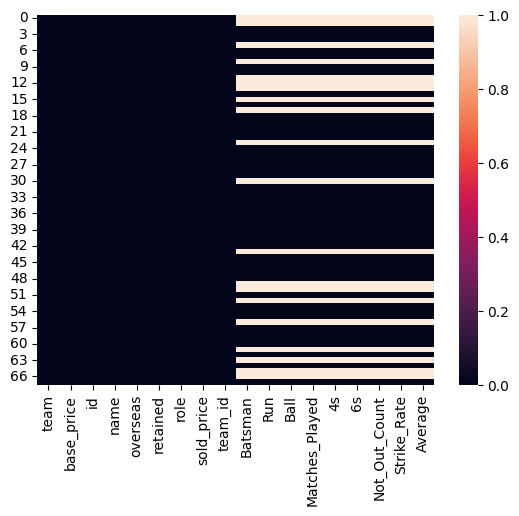

In [ ]:
import seaborn as sb
sb.heatmap(batsman_auction_combined_dataset.isnull())

In [ ]:
batsman_auction_combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   team            68 non-null     object 
 1   base_price      68 non-null     float64
 2   id              68 non-null     int64  
 3   name            68 non-null     object 
 4   overseas        68 non-null     int64  
 5   retained        68 non-null     int64  
 6   role            68 non-null     object 
 7   sold_price      68 non-null     int64  
 8   team_id         68 non-null     int64  
 9   Batsman         48 non-null     object 
 10  Run             48 non-null     float64
 11  Ball            48 non-null     float64
 12  Matches_Played  48 non-null     float64
 13  4s              48 non-null     float64
 14  6s              48 non-null     float64
 15  Not_Out_Count   48 non-null     float64
 16  Strike_Rate     48 non-null     float64
 17  Average         48 non-null     float

In [ ]:
batsman_auction_combined_dataset.head(10)

,team,base_price,id,name,overseas,retained,role,sold_price,team_id,Batsman,Run,Ball,Matches_Played,4s,6s,Not_Out_Count,Strike_Rate,Average
0,KKR,2000000.0,1048813,Narayan Jagadeesan,0,0,batsman,9000000,4341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CSK,0.0,1059577,Subhranshu Senapati,0,1,batsman,2000000,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CSK,0.0,1060380,Ruturaj Gaikwad,0,1,batsman,60000000,4343,Ruturaj Gaikwad,581.0,397.0,13.0,48.0,29.0,2.0,146.347607,52.818182
3,DD,0.0,1070168,Prithvi Shaw,0,1,batsman,80000000,4344,Prithvi Shaw,106.0,85.0,8.0,16.0,1.0,0.0,124.705882,13.250000
4,GT,0.0,1070173,Shubman Gill,0,1,batsman,80000000,6904,Shubman Gill,680.0,446.0,14.0,67.0,22.0,2.0,152.466368,56.666667
5,MI,0.0,1070665,Dewald Brevis,1,1,batsman,30000000,4346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,RR,0.0,1119026,Devdutt Padikkal,0,1,batsman,77500000,4345,Devdutt Padikkal,261.0,200.0,11.0,31.0,6.0,1.0,130.500000,26.100000
7,RCB,0.0,1123073,Anuj Rawat,0,1,batsman,34000000,4340,Anuj Rawat,91.0,71.0,7.0,6.0,4.0,4.0,128.169014,30.333333
8,AHM,2000000.0,1131570,Urvil Patel,0,0,batsman,2000000,6904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KXIP,0.0,1161024,Prabhsimran Singh,0,1,batsman,6000000,4342,Prabhsimran Singh,358.0,238.0,14.0,38.0,19.0,0.0,150.420168,25.571429


In [ ]:
df = batsman_auction_combined_dataset
filtered_df = df[df['Batsman'].isna() | df['Batsman'].isnull()]

# Display the filtered DataFrame
filtered_df.shape
# filtered_df.head(5)

(20, 18)

<Axes: >

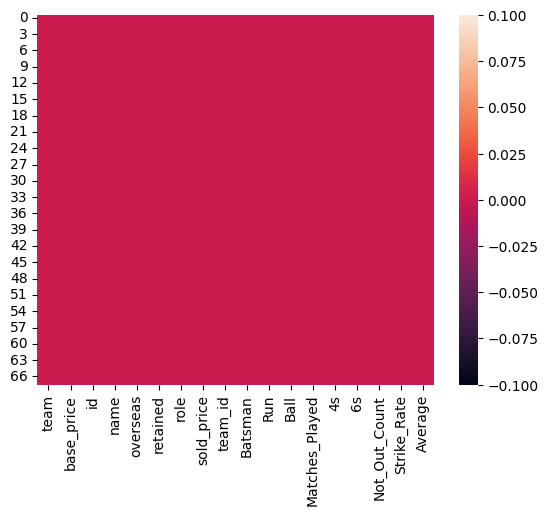

In [ ]:
batsman_auction_combined_dataset.fillna(0, inplace=True)
sb.heatmap(batsman_auction_combined_dataset.isnull())

In [ ]:
batsman_auction_combined_dataset = batsman_auction_combined_dataset.drop(['team','name', 'role', 'Batsman'], axis = 1)

### **Add expensive field if sold_price is above 4.7cr a player is expensive**

In [ ]:
batsman_auction_combined_dataset['expensive'] = batsman_auction_combined_dataset['sold_price'] > 47316176.47058824

# Convert boolean values to 1 for True and 0 for False
batsman_auction_combined_dataset['expensive'] = batsman_auction_combined_dataset['expensive'].astype(int)
batsman_auction_combined_dataset.head(5)

,base_price,id,overseas,retained,sold_price,team_id,Run,Ball,Matches_Played,4s,6s,Not_Out_Count,Strike_Rate,Average,expensive
0,2000000.0,1048813,0,0,9000000,4341,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0
1,0.0,1059577,0,1,2000000,4343,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0
2,0.0,1060380,0,1,60000000,4343,581.0,397.0,13.0,48.0,29.0,2.0,146.347607,52.818182,1
3,0.0,1070168,0,1,80000000,4344,106.0,85.0,8.0,16.0,1.0,0.0,124.705882,13.250000,1
4,0.0,1070173,0,1,80000000,6904,680.0,446.0,14.0,67.0,22.0,2.0,152.466368,56.666667,1


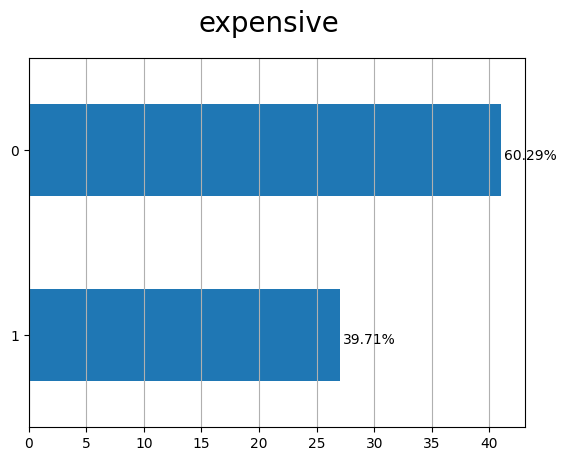

In [ ]:

# Create a histogram
ax = batsman_auction_combined_dataset['expensive'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle('expensive', fontsize=20)
plt.show()

Arond 40% of the player are **expensive**

Setting Target as "**Expensive**" and X = all other attrubutes

In [ ]:
filtered_data = batsman_auction_combined_dataset[batsman_auction_combined_dataset['Matches_Played'] != 0]
X = filtered_data.drop(columns=['id','sold_price','expensive'])
Y = filtered_data['expensive']

We removed the players data which were sold but did not get to play in the tournament

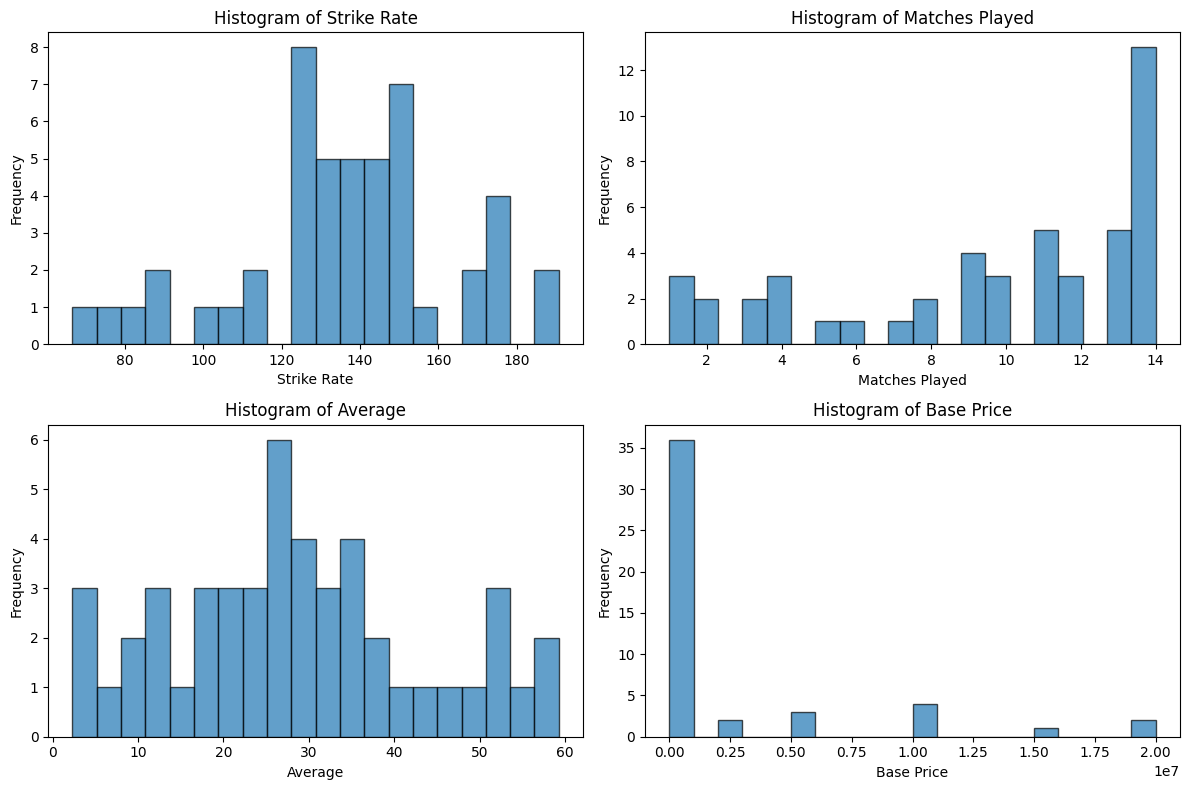

In [ ]:
df = X


# Create a figure with subplots for each histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the histogram for 'Strike_Rate'
axes[0, 0].hist(df['Strike_Rate'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Strike Rate')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Strike Rate')

# Plot the histogram for 'Matches_Played'
axes[0, 1].hist(df['Matches_Played'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Matches Played')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Matches Played')

# Plot the histogram for 'Average'
axes[1, 0].hist(df['Average'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Average')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Average')

# Plot the histogram for 'base_price'
axes[1, 1].hist(df['base_price'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Base Price')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Base Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



Attribute average, strike_rate is near a bell curve(normal distribution) rest are not

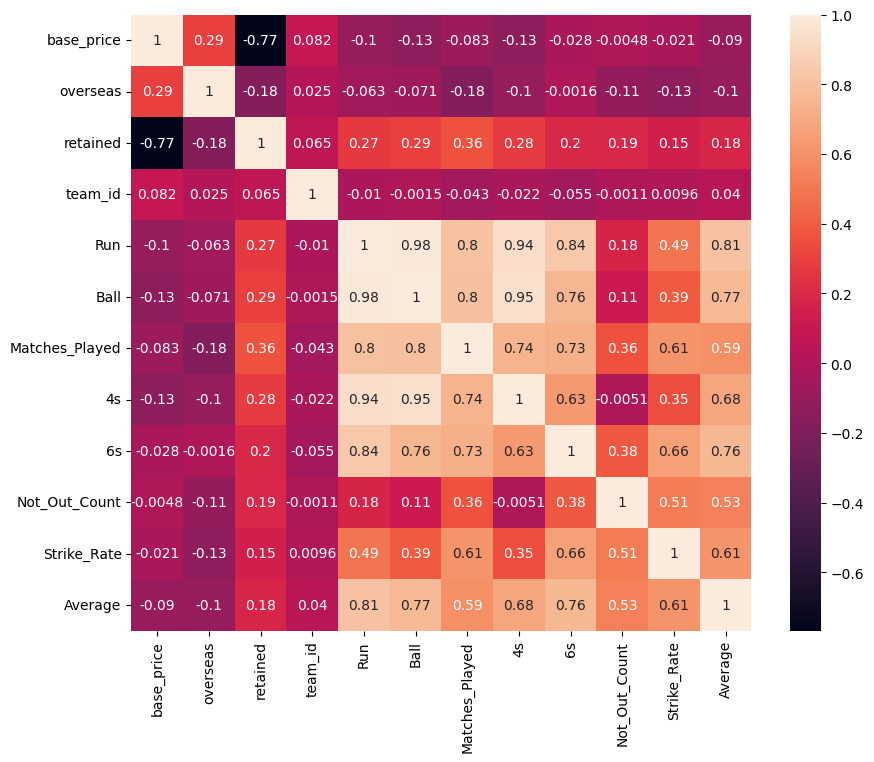

In [ ]:
plt.figure(figsize=(10,8))
sb.heatmap(X.corr(),annot = True,color = 'r')
plt.show()

**Co-relateion is higher between run ball 4s and 6s, hence we can remove. It makse sense because the higher matches you have played, it has more correlation between 4s 6s and runs. we can keep matches played, average, strike rate.###**

In [ ]:
columns_to_drop = ['Run', 'Ball','4s', '6s']
X = X.drop(columns=columns_to_drop)
X_dataset1 = X
Y_dataset1 = Y

## Baseline Muller Loop

In [ ]:
# Modified from ...
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = X_dataset1, Y_dataset1

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)

# TODO (Apply): All cross-validation
results_1 = []

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    elapsed_time = time.time() - start_time
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % elapsed_time)

    results_1.append({
        'Classifier': name,
        'Score': score,
        'Training Time': elapsed_time
    })
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 70.00, Training time = 0.01 seconds
Classifier = Linear SVM, Score (test, accuracy) = 60.00, Training time = 0.00 seconds
Classifier = RBF SVM, Score (test, accuracy) = 50.00, Training time = 0.00 seconds
Classifier = Decision Tree, Score (test, accuracy) = 80.00, Training time = 0.00 seconds
Classifier = Random Forest, Score (test, accuracy) = 60.00, Training time = 0.04 seconds
Classifier = Neural Net, Score (test, accuracy) = 60.00, Training time = 0.36 seconds
Classifier = AdaBoost, Score (test, accuracy) = 90.00, Training time = 0.19 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 50.00, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 40.00, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classifier = AdaBoost, Score (test, accuracy) = 90.00


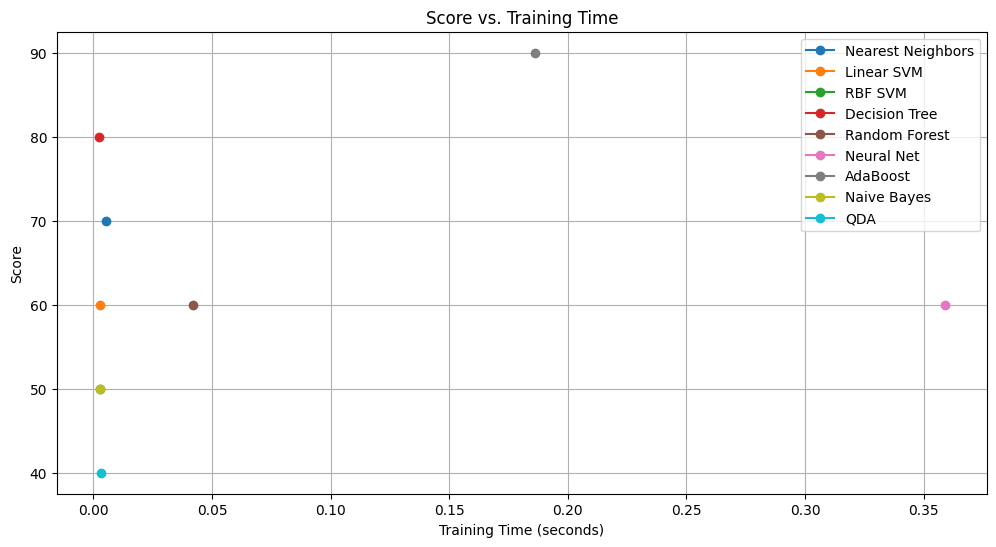

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a list 'results_1' containing dictionaries with 'Classifier', 'Score', and 'Training Time' keys

# Extract X (time), Y (score), and Classifier data
X = [result['Training Time'] for result in results_1]
Y = [result['Score'] for result in results_1]
classifiers = [result['Classifier'] for result in results_1]

# Create a DataFrame to store classifier-color mapping
color_df = pd.DataFrame({'Classifier': classifiers})

# Define a colormap for assigning unique colors to classifiers
cmap = plt.get_cmap('tab10', len(classifiers))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('Training Time (seconds)')
ax.set_ylabel('Score')
ax.set_title('Score vs. Training Time')

# Plot each classifier's data with a unique color
for i, classifier in enumerate(classifiers):
    ax.plot(X[i], Y[i], marker='o', linestyle='-', color=cmap(i), label=classifier)

# Add a legend to the plot
ax.legend(loc='upper right')


plt.grid(True)
plt.show()



### K-Nearest Neighbor Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset1, Y_dataset1, test_size=0.2, random_state=0)

# Standardize the feature data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the KNN classifier
kn_clf = KNeighborsClassifier(n_neighbors=3)
kn_clf.fit(X_train_scaled, Y_train)

# Predict labels for the test set
Y_pred = kn_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Calculate F1-score
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("F1-score:", f1)


Accuracy: 0.7
F1-score: 0.7272727272727272


### XGBoost algorithm

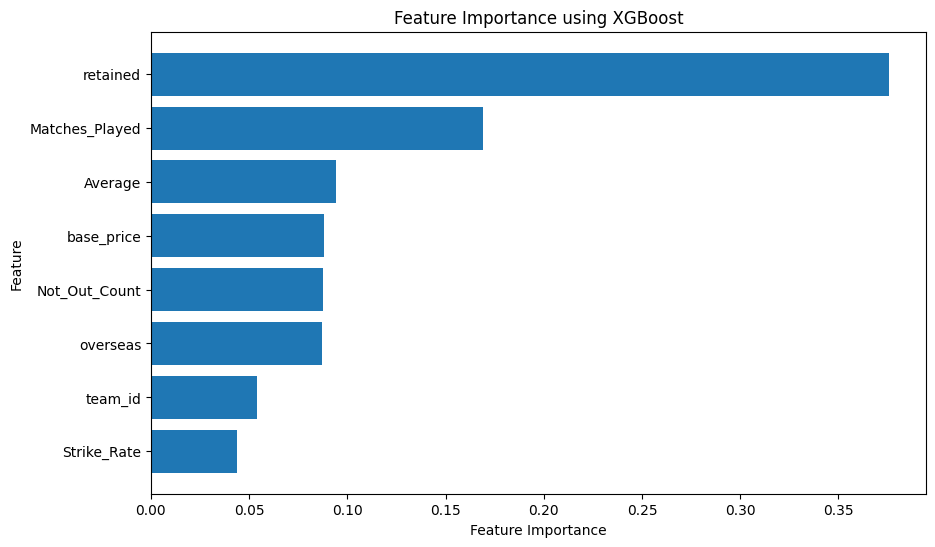

In [ ]:
from xgboost import XGBRegressor

# Assuming you have X and Y defined as follows:
# X = Your feature matrix (independent variables)
# Y = Your target variable (dependent variable)

# Instantiate XGBoost regressor
model = XGBRegressor()
model.fit(X_dataset1, Y_dataset1)

# Get feature importances
feature_importances = model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_dataset1.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using XGBoost')
plt.show()

This feature importance does not make sense as it is focusing on non-important features

### LinearRegression

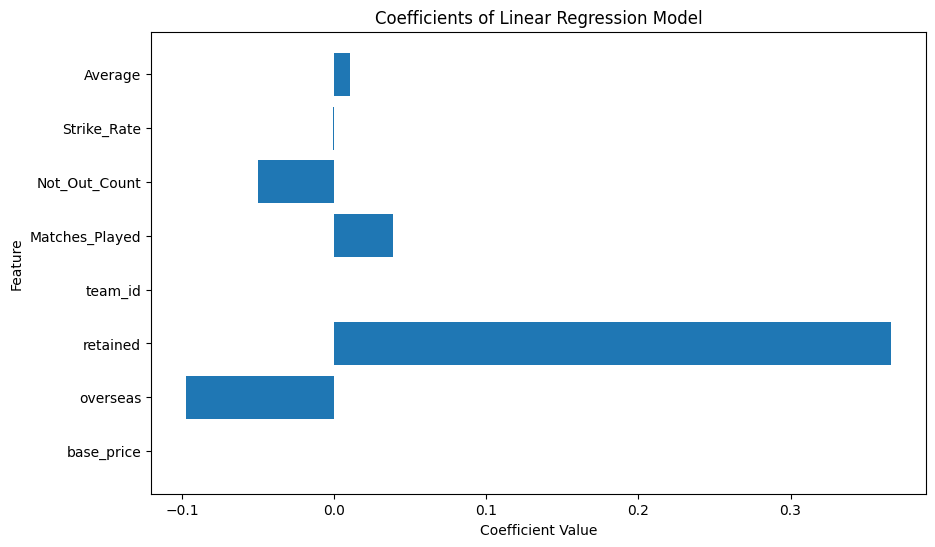

In [ ]:
from sklearn.linear_model import LinearRegression
# Instantiate Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_dataset1, Y_dataset1)

# Get coefficients and feature names
coefficients = model.coef_
feature_names = X_dataset1.columns

# Create a DataFrame to store coefficients and their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Linear Regression Model')
plt.show()

This feature importance does not make sense as it is focusing on non-important features

### F regression

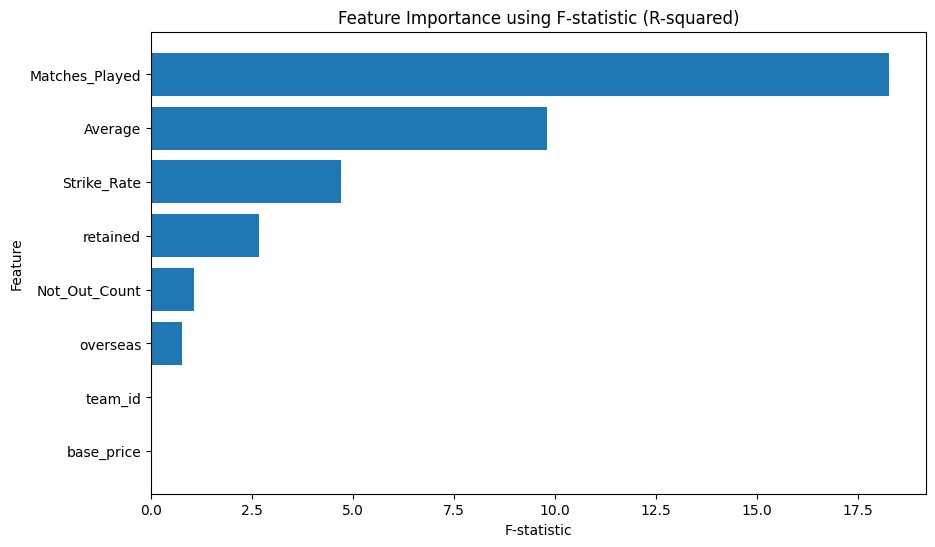

In [ ]:
from sklearn.feature_selection import f_regression
f_statistic, p_values = f_regression(X_dataset1, Y_dataset1)

# Sort features by F-statistic
sorted_idx = np.argsort(f_statistic)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_dataset1.columns[sorted_idx], f_statistic[sorted_idx])
plt.xlabel('F-statistic')
plt.ylabel('Feature')
plt.title('Feature Importance using F-statistic (R-squared)')
plt.show()

This feature importance focuses on correct attributes which are important in batters performance and deciding his price

### KNeighborsRegressor

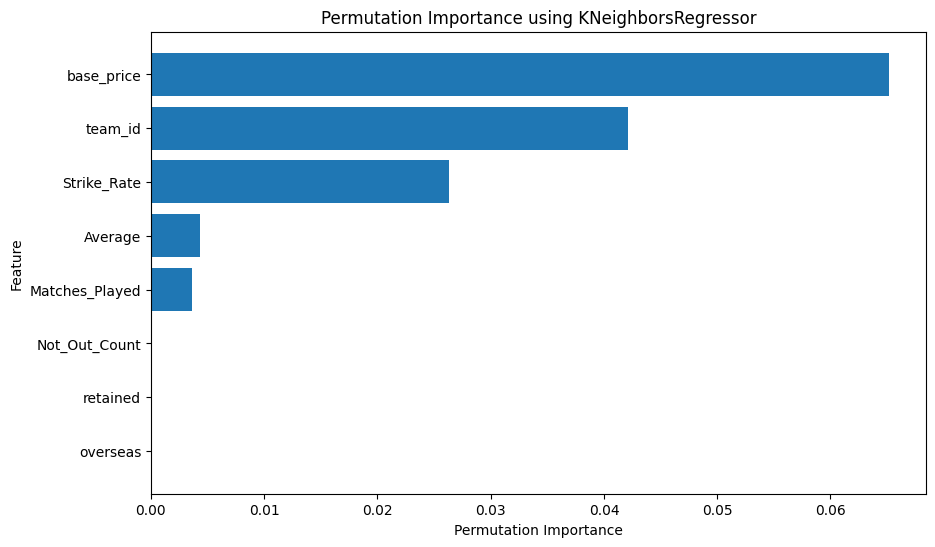

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have X and Y defined as follows:
# X = Your feature matrix (independent variables)
# Y = Your target variable (dependent variable)

# Instantiate KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_dataset1, Y_dataset1)

# Calculate permutation importance
results = permutation_importance(knn, X_dataset1, Y_dataset1, scoring='neg_mean_squared_error')

# Sort features by importance
sorted_idx = results.importances_mean.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_dataset1.columns[sorted_idx], results.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance using KNeighborsRegressor')
plt.show()

### **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset1, Y_dataset1, test_size=0.2, random_state=0)

# Standardize the feature data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train_scaled, Y_train)

# Predict labels for the test set
Y_pred = dt_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Calculate F1-score
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("F1-score:", f1)


Accuracy: 0.6
F1-score: 0.6


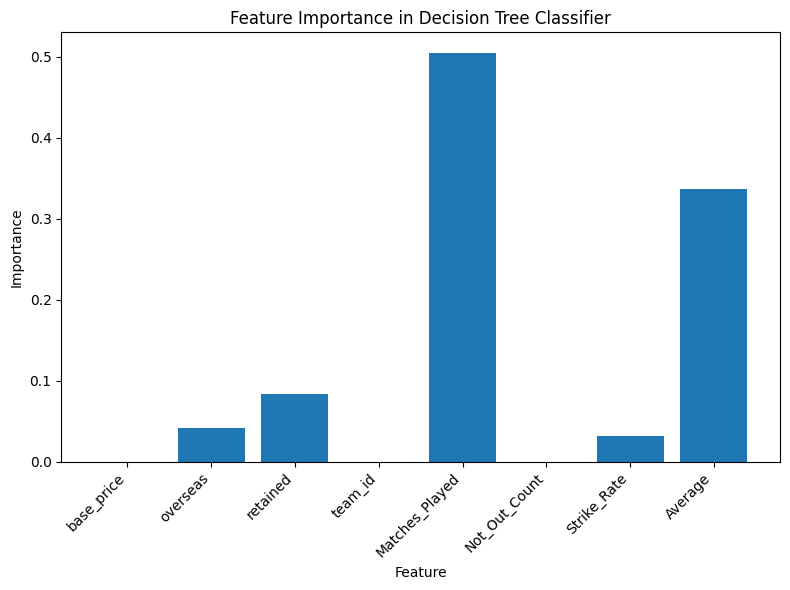

In [ ]:
feature_importances = dt_classifier.feature_importances_

# Create a bar chart to visualize feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(X_train_scaled.shape[1]), feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.xticks(range(X_train_scaled.shape[1]), X_dataset1.columns, rotation=45, ha='right')
plt.tight_layout()

plt.show()

**DecisionTreeClassifier is shocasing the right order of importance to features**

***Confusion Matrix for DecisionTreeClassifier***

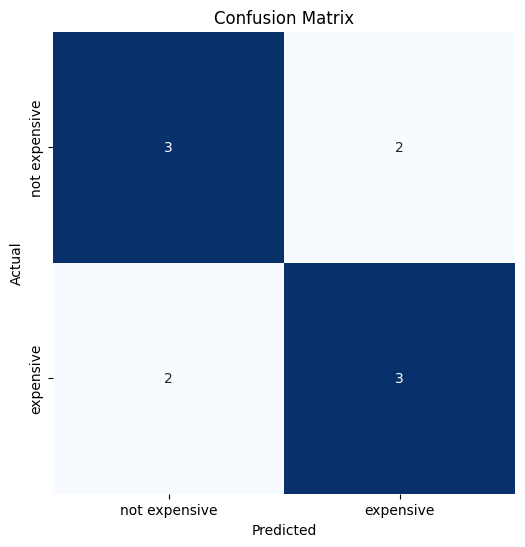

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False,
            xticklabels=["not expensive", "expensive"], yticklabels=["not expensive", "expensive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
importance_df = pd.DataFrame({'Feature': X_dataset1.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance table
print(importance_df)

          Feature  Importance
4  Matches_Played    0.505111
7         Average    0.337496
2        retained    0.083709
1        overseas    0.042105
6     Strike_Rate    0.031579
0      base_price    0.000000
3         team_id    0.000000
5   Not_Out_Count    0.000000


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def muller_loop(X_dataset1, Y_dataset1):
    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "QDA"]

    classifiers = [
        KNeighborsClassifier(2),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]

    X, y = X_dataset1, Y_dataset1

    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2)

    results_1 = []

    max_score = 0.0
    max_class = ''
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        start_time = time.time()
        clf.fit(X_train, y_train)
        score = 100.0 * clf.score(X_test, y_test)
        elapsed_time = time.time() - start_time
        # print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % elapsed_time)
        Y_pred = clf.predict(X_test)
        results_1.append({
            'Classifier': name,
            'Score': score,
            'Training Time': elapsed_time,
            'y_pred': Y_pred,
            'y_test': y_test
        })
        if score > max_score:
            clf_best = clf
            max_score = score
            max_class = name

    # print(80*'-' )
    # print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

    return results_1

# Example usage:
# results = muller_loop(X_dataset1, Y_dataset1)


### Choosing top 5 Attributes

In [ ]:
top_5_features = importance_df.nlargest(5, 'Importance')
top_5_feature_list = top_5_features['Feature'].tolist()
print(top_5_feature_list)

['Matches_Played', 'Average', 'retained', 'overseas', 'Strike_Rate']


## **Muller Loop with Upsampling and Downsampling with specific attributes**

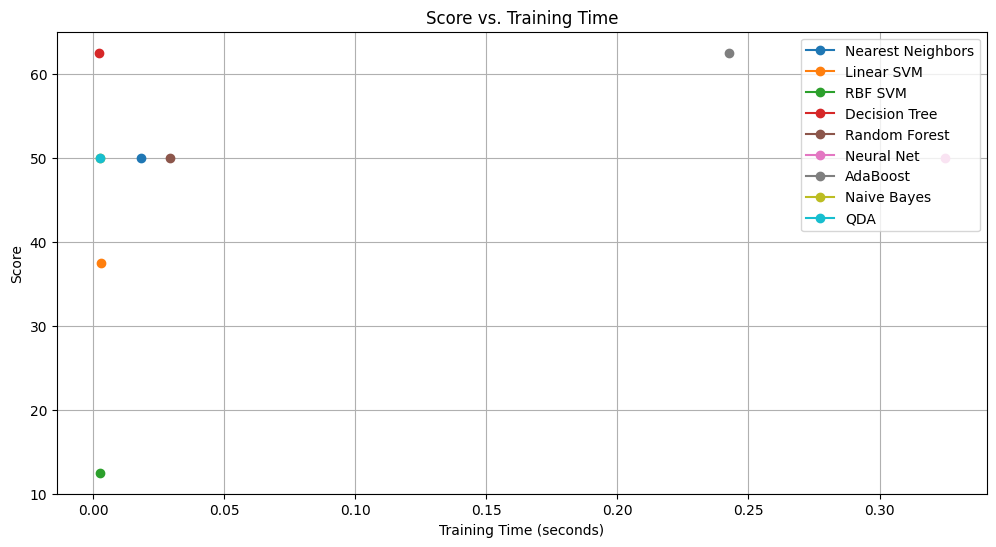

In [ ]:
from sklearn.utils import resample
import ipywidgets as widgets
from IPython.display import clear_output

# Dropdown widget for choosing the most_important_feature
feature_dropdown = widgets.Dropdown(
    options=top_5_feature_list,
    description='Select Feature:',
    disabled=False
)

slider = widgets.IntSlider(min=-1, max=1, step=1, value=0, description='Slider')

def on_feature_change(change):
    # global most_important_feature  # Make sure to update the global variable
    # most_important_feature = feature_dropdown.value
    on_slider_change({'new': slider.value}, feature_dropdown.value)

# Attach the on_feature_change function to the dropdown's observe event
feature_dropdown.observe(on_feature_change, names='value')

def on_slider_change(change, mi_feature):
    slider_value = change['new']

    # Compute the median value of the most important feature
    median_value = X_train[mi_feature].median()

    operation = "No modification"  # Default operation message
    if slider_value == 1:
        # Upsample data where values of the most important feature are greater than the median
        condition = X_train[mi_feature] > median_value
        X_upsample, y_upsample = resample(X_train[condition], y_train[condition], replace=True, n_samples=len(y_train[~condition]))

        X_train_new = pd.concat([X_train[~condition], X_upsample])
        y_train_new = np.concatenate([y_train[~condition], y_upsample])
        operation = "Upsampling"

    elif slider_value == -1:
        # Downsample data where values of the most important feature are less than the median
        condition = X_train[mi_feature] < median_value
        X_subset = X_train[condition]
        y_subset = y_train[condition]

        downsample_size = min(len(y_subset), len(y_train[~condition]))

        X_downsample, y_downsample = resample(X_subset, y_subset, replace=False, n_samples=downsample_size)

        X_train_new = pd.concat([X_train[~condition], X_downsample])
        y_train_new = np.concatenate([y_train[~condition], y_downsample])
        operation = "Downsampling"

    else:
        X_train_new, y_train_new = X_train, y_train

    print(f"Operation: {operation}")

    # Call the muller_loop function with the modified dataset
    results_1 = muller_loop(X_train_new, y_train_new)
    plot_results(results_1)

def plot_results(results_1):
    clear_output(wait=True)
    X = [result['Training Time'] for result in results_1]
    Y = [result['Score'] for result in results_1]
    classifiers = [result['Classifier'] for result in results_1]

    # Create a DataFrame to store classifier-color mapping
    color_df = pd.DataFrame({'Classifier': classifiers})

    # Define a colormap for assigning unique colors to classifiers
    cmap = plt.get_cmap('tab10', len(classifiers))

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlabel('Training Time (seconds)')
    ax.set_ylabel('Score')
    ax.set_title('Score vs. Training Time')

    # Plot each classifier's data with a unique color
    for i, classifier in enumerate(classifiers):
        ax.plot(X[i], Y[i], marker='o', linestyle='-', color=cmap(i), label=classifier)

    # Add a legend to the plot
    ax.legend(loc='upper right')
    plt.grid(True)

    display(widgets.VBox([feature_dropdown, slider]))
    plt.show()

# Ensure X_train and y_train have matching indices before starting the slider
# You can reset the indices to ensure they match.
X_train.reset_index(drop=True, inplace=True)
y_train = y_train.reset_index(drop=True)

# Initial call to set the most_important_feature
on_slider_change({'new': slider.value}, feature_dropdown.value)


## **Decision Tree Classifier**
: done by Raghav

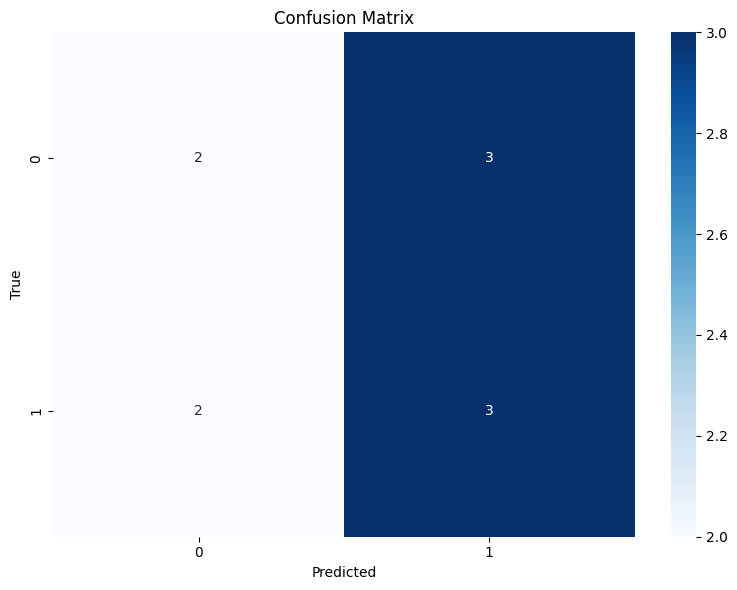

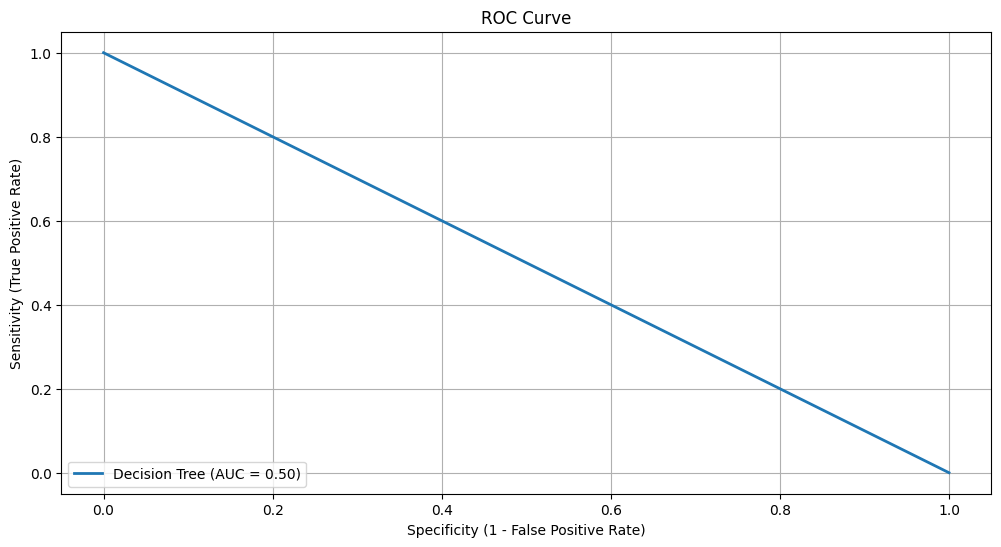

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc


# Dropdown widget for choosing the most_important_feature
feature_dropdown = widgets.Dropdown(
    options=top_5_feature_list,
    description='Select Feature:',
    disabled=False
)
slider = widgets.IntSlider(min=-1, max=1, step=1, value=0, description='Slider')

def on_feature_change_1(change):
    # global most_important_feature  # Make sure to update the global variable
    # most_important_feature =
    on_slider_change({'new': slider.value}, feature_dropdown.value)

# Attach the on_feature_change function to the dropdown's observe event
feature_dropdown.observe(on_feature_change_1, names='value')

def on_slider_change_1(change, mi_feature):
    slider_value = change['new']

    # Compute the median value of the most important feature
    median_value = X_train[mi_feature].median()

    operation = "No modification"  # Default operation message
    if slider_value == 1:
        # Upsample data where values of the most important feature are greater than the median
        condition = X_train[mi_feature] > median_value
        X_upsample, y_upsample = resample(X_train[condition], y_train[condition], replace=True, n_samples=len(y_train[~condition]))

        X_train_new = pd.concat([X_train[~condition], X_upsample])
        y_train_new = np.concatenate([y_train[~condition], y_upsample])
        operation = "Upsampling"

    elif slider_value == -1:
        # Downsample data where values of the most important feature are less than the median
        condition = X_train[mi_feature] < median_value
        X_subset = X_train[condition]
        y_subset = y_train[condition]

        downsample_size = min(len(y_subset), len(y_train[~condition]))

        X_downsample, y_downsample = resample(X_subset, y_subset, replace=False, n_samples=downsample_size)

        X_train_new = pd.concat([X_train[~condition], X_downsample])
        y_train_new = np.concatenate([y_train[~condition], y_downsample])
        operation = "Downsampling"

    else:
        X_train_new, y_train_new = X_train, y_train

    print(f"Operation: {operation}")

    # Use only the Decision Tree classifier
    clf = DecisionTreeClassifier(max_depth=5)
    start_time = time.time()
    clf.fit(X_train_new, y_train_new)
    score = 100.0 * clf.score(X_test, y_test)
    elapsed_time = time.time() - start_time
    Y_pred = clf.predict(X_test)

    results_dt_clf = {
        'Classifier': 'Decision Tree',
        'Score': score,
        'Training Time': elapsed_time,
        'y_pred': Y_pred,
        'y_test': y_test
    }
    print(results_dt_clf)
    plot_results_1(results_dt_clf)

def plot_results_1(result):
    clear_output(wait=True)
    # Extract data from the result
    y_tests = result['y_test']  # True labels
    y_preds = result['y_pred']  # Predicted labels

    # Create subplots for score vs. training time
    fig, axs = plt.subplots(1, 1, figsize=(8, 6))

    # Plot confusion matrix
    cm = confusion_matrix(y_tests, y_preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs)
    axs.set_xlabel("Predicted")
    axs.set_ylabel("True")
    axs.set_title("Confusion Matrix")

    plt.tight_layout()
    display(widgets.VBox([feature_dropdown, slider]))
    plt.show()
    plot_roc_curve_1(result)

def plot_roc_curve_1(result):
    # Initialize the figure for ROC curve
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlabel('Specificity (1 - False Positive Rate)')
    ax.set_ylabel('Sensitivity (True Positive Rate)')
    ax.set_title('ROC Curve')

    y_test = result['y_test']
    y_pred = result['y_pred']
    classifier = result['Classifier']

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the classifier
    ax.plot(1 - fpr, tpr, lw=2, label=f'{classifier} (AUC = {roc_auc:.2f})')

    # Add a legend to the plot
    ax.legend(loc='lower left')
    plt.grid(True)
    plt.show()
# Ensure X_train and y_train have matching indices before starting the slider
# You can reset the indices to ensure they match.
X_train.reset_index(drop=True, inplace=True)
y_train = y_train.reset_index(drop=True)

# Initial call to set the most_important_feature
on_slider_change_1({'new': slider.value}, feature_dropdown.value)
# Display the dropdown and slider widgets
# display(feature_dropdown, slider)
# display(widgets.VBox([feature_dropdown, slider]))

## **RandomForestClassifier**
: done by Rishabh

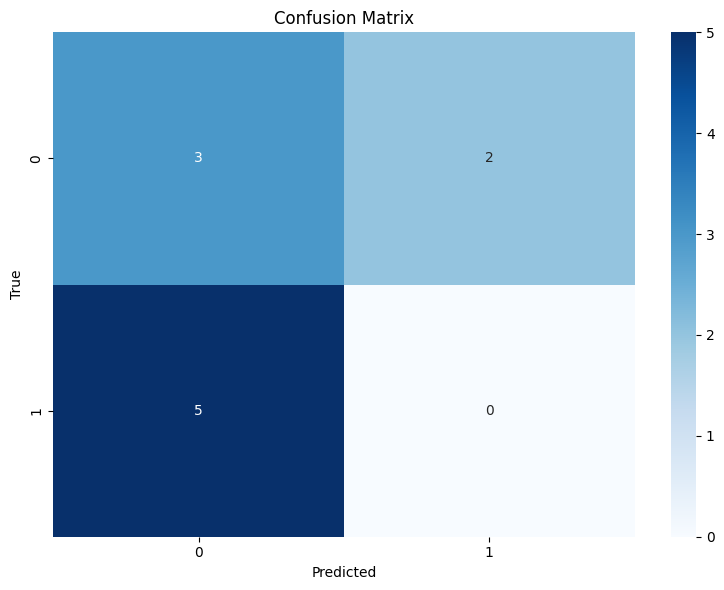

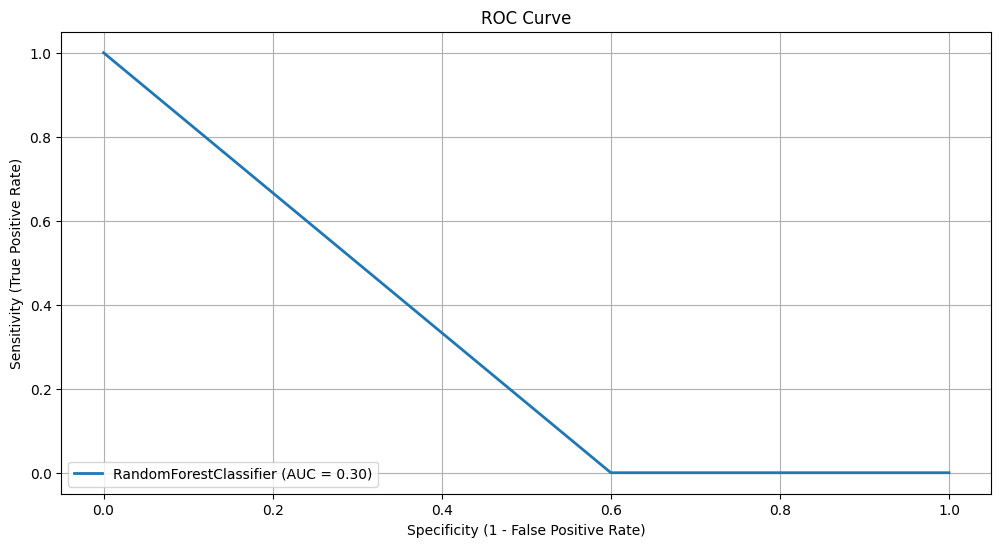

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc


# Dropdown widget for choosing the most_important_feature
feature_dropdown = widgets.Dropdown(
    options=top_5_feature_list,
    description='Select Feature:',
    disabled=False
)
slider = widgets.IntSlider(min=-1, max=1, step=1, value=0, description='Slider')

def on_feature_change_2(change):
    # global most_important_feature  # Make sure to update the global variable
    # most_important_feature =
    on_slider_change_2({'new': slider.value}, feature_dropdown.value)

# Attach the on_feature_change function to the dropdown's observe event
feature_dropdown.observe(on_feature_change_2, names='value')

def on_slider_change_2(change, mi_feature):
    slider_value = change['new']

    # Compute the median value of the most important feature
    median_value = X_train[mi_feature].median()

    operation = "No modification"  # Default operation message
    if slider_value == 1:
        # Upsample data where values of the most important feature are greater than the median
        condition = X_train[mi_feature] > median_value
        X_upsample, y_upsample = resample(X_train[condition], y_train[condition], replace=True, n_samples=len(y_train[~condition]))

        X_train_new = pd.concat([X_train[~condition], X_upsample])
        y_train_new = np.concatenate([y_train[~condition], y_upsample])
        operation = "Upsampling"

    elif slider_value == -1:
        # Downsample data where values of the most important feature are less than the median
        condition = X_train[mi_feature] < median_value
        X_subset = X_train[condition]
        y_subset = y_train[condition]

        downsample_size = min(len(y_subset), len(y_train[~condition]))

        X_downsample, y_downsample = resample(X_subset, y_subset, replace=False, n_samples=downsample_size)

        X_train_new = pd.concat([X_train[~condition], X_downsample])
        y_train_new = np.concatenate([y_train[~condition], y_downsample])
        operation = "Downsampling"

    else:
        X_train_new, y_train_new = X_train, y_train

    print(f"Operation: {operation}")

    # Use only the Decision Tree classifier
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=0)
    start_time = time.time()
    clf.fit(X_train_new, y_train_new)
    score = 100.0 * clf.score(X_test, y_test)
    elapsed_time = time.time() - start_time
    Y_pred = clf.predict(X_test)

    results_dt_clf = {
        'Classifier': 'RandomForestClassifier',
        'Score': score,
        'Training Time': elapsed_time,
        'y_pred': Y_pred,
        'y_test': y_test
    }
    print(results_dt_clf)
    plot_results_1(results_dt_clf)


# Ensure X_train and y_train have matching indices before starting the slider
# You can reset the indices to ensure they match.
X_train.reset_index(drop=True, inplace=True)
y_train = y_train.reset_index(drop=True)

# Initial call to set the most_important_feature
on_slider_change_2({'new': slider.value}, feature_dropdown.value)
# Display the dropdown and slider widgets
# display(feature_dropdown, slider)
# display(widgets.VBox([feature_dropdown, slider]))

## **Linear SVM**
: done by Aishwarya

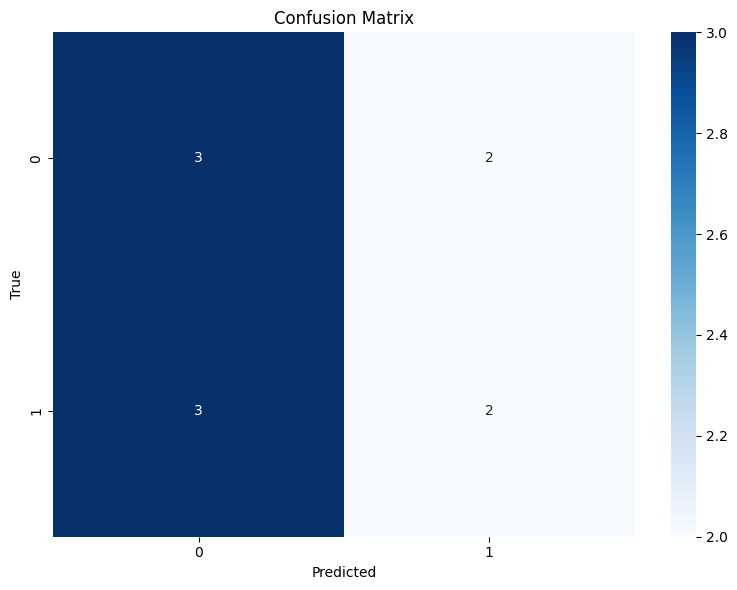

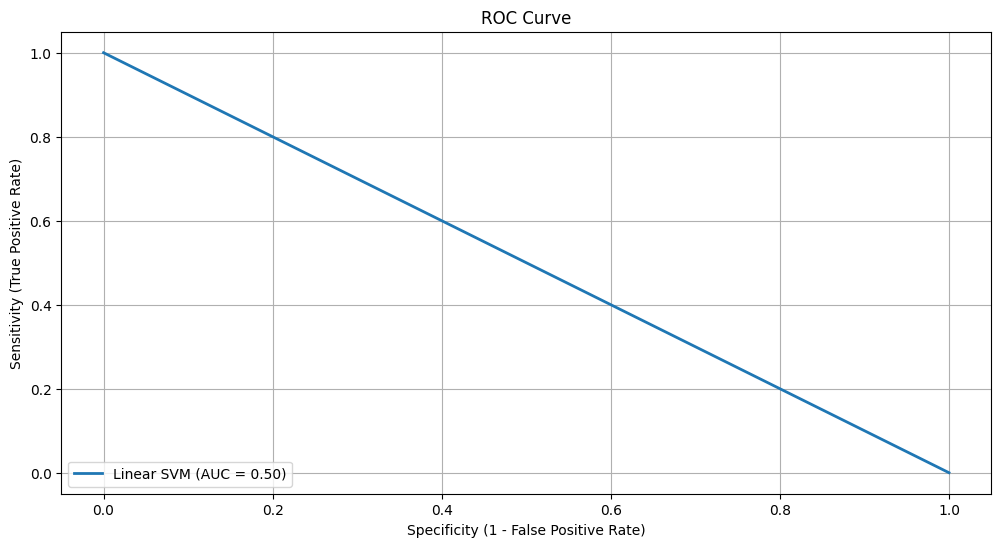

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc


# Dropdown widget for choosing the most_important_feature
feature_dropdown = widgets.Dropdown(
    options=top_5_feature_list,
    description='Select Feature:',
    disabled=False
)
slider = widgets.IntSlider(min=-1, max=1, step=1, value=0, description='Slider')

def on_feature_change_3(change):
    # global most_important_feature  # Make sure to update the global variable
    # most_important_feature =
    on_slider_change_3({'new': slider.value}, feature_dropdown.value)

# Attach the on_feature_change function to the dropdown's observe event
feature_dropdown.observe(on_feature_change_3, names='value')

def on_slider_change_3(change, mi_feature):
    slider_value = change['new']

    # Compute the median value of the most important feature
    median_value = X_train[mi_feature].median()

    operation = "No modification"  # Default operation message
    if slider_value == 1:
        # Upsample data where values of the most important feature are greater than the median
        condition = X_train[mi_feature] > median_value
        X_upsample, y_upsample = resample(X_train[condition], y_train[condition], replace=True, n_samples=len(y_train[~condition]))

        X_train_new = pd.concat([X_train[~condition], X_upsample])
        y_train_new = np.concatenate([y_train[~condition], y_upsample])
        operation = "Upsampling"

    elif slider_value == -1:
        # Downsample data where values of the most important feature are less than the median
        condition = X_train[mi_feature] < median_value
        X_subset = X_train[condition]
        y_subset = y_train[condition]

        downsample_size = min(len(y_subset), len(y_train[~condition]))

        X_downsample, y_downsample = resample(X_subset, y_subset, replace=False, n_samples=downsample_size)

        X_train_new = pd.concat([X_train[~condition], X_downsample])
        y_train_new = np.concatenate([y_train[~condition], y_downsample])
        operation = "Downsampling"

    else:
        X_train_new, y_train_new = X_train, y_train

    print(f"Operation: {operation}")

    # Use only the Decision Tree classifier
    clf = SVC(kernel="linear", C=0.025)
    start_time = time.time()
    clf.fit(X_train_new, y_train_new)
    score = 100.0 * clf.score(X_test, y_test)
    elapsed_time = time.time() - start_time
    Y_pred = clf.predict(X_test)

    results_dt_clf = {
        'Classifier': 'Linear SVM',
        'Score': score,
        'Training Time': elapsed_time,
        'y_pred': Y_pred,
        'y_test': y_test
    }
    print(results_dt_clf)
    plot_results_1(results_dt_clf)


# Ensure X_train and y_train have matching indices before starting the slider
# You can reset the indices to ensure they match.
X_train.reset_index(drop=True, inplace=True)
y_train = y_train.reset_index(drop=True)

# Initial call to set the most_important_feature
on_slider_change_3({'new': slider.value}, feature_dropdown.value)
# Display the dropdown and slider widgets
# display(feature_dropdown, slider)
# display(widgets.VBox([feature_dropdown, slider]))

## **QDA**
: done by Srinishaa

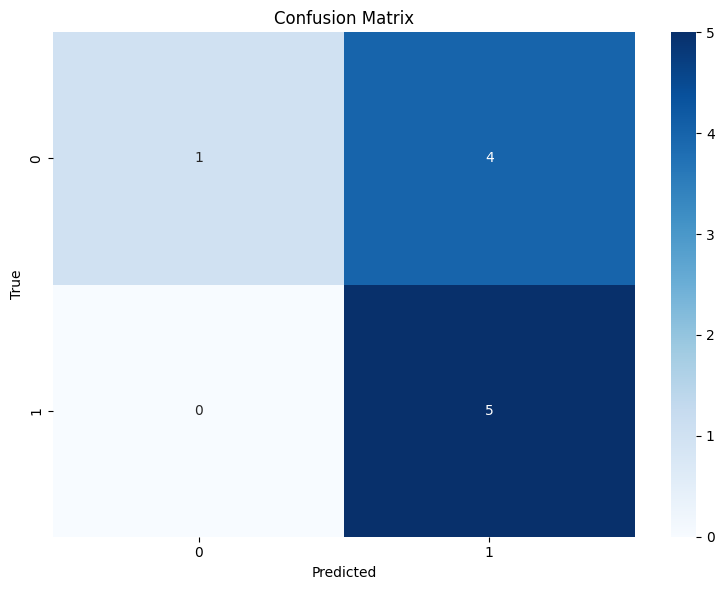

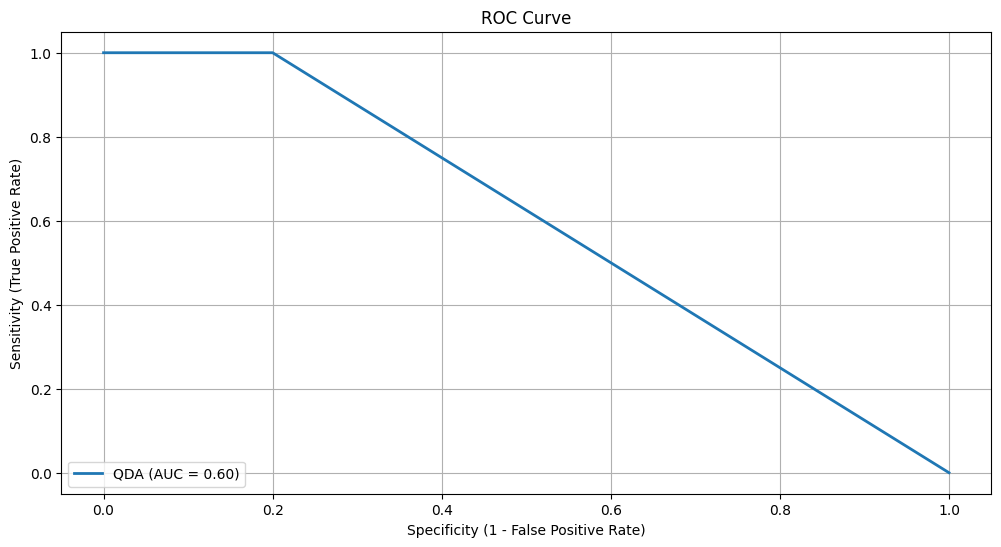

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc


# Dropdown widget for choosing the most_important_feature
feature_dropdown = widgets.Dropdown(
    options=top_5_feature_list,
    description='Select Feature:',
    disabled=False
)
slider = widgets.IntSlider(min=-1, max=1, step=1, value=0, description='Slider')

def on_feature_change_4(change):
    # global most_important_feature  # Make sure to update the global variable
    # most_important_feature =
    on_slider_change_4({'new': slider.value}, feature_dropdown.value)

# Attach the on_feature_change function to the dropdown's observe event
feature_dropdown.observe(on_feature_change_4, names='value')

def on_slider_change_4(change, mi_feature):
    slider_value = change['new']

    # Compute the median value of the most important feature
    median_value = X_train[mi_feature].median()

    operation = "No modification"  # Default operation message
    if slider_value == 1:
        # Upsample data where values of the most important feature are greater than the median
        condition = X_train[mi_feature] > median_value
        X_upsample, y_upsample = resample(X_train[condition], y_train[condition], replace=True, n_samples=len(y_train[~condition]))

        X_train_new = pd.concat([X_train[~condition], X_upsample])
        y_train_new = np.concatenate([y_train[~condition], y_upsample])
        operation = "Upsampling"

    elif slider_value == -1:
        # Downsample data where values of the most important feature are less than the median
        condition = X_train[mi_feature] < median_value
        X_subset = X_train[condition]
        y_subset = y_train[condition]

        downsample_size = min(len(y_subset), len(y_train[~condition]))

        X_downsample, y_downsample = resample(X_subset, y_subset, replace=False, n_samples=downsample_size)

        X_train_new = pd.concat([X_train[~condition], X_downsample])
        y_train_new = np.concatenate([y_train[~condition], y_downsample])
        operation = "Downsampling"

    else:
        X_train_new, y_train_new = X_train, y_train

    print(f"Operation: {operation}")

    # Use only the Decision Tree classifier
    clf = QuadraticDiscriminantAnalysis()
    start_time = time.time()
    clf.fit(X_train_new, y_train_new)
    score = 100.0 * clf.score(X_test, y_test)
    elapsed_time = time.time() - start_time
    Y_pred = clf.predict(X_test)

    results_dt_clf = {
        'Classifier': 'QDA',
        'Score': score,
        'Training Time': elapsed_time,
        'y_pred': Y_pred,
        'y_test': y_test
    }
    print(results_dt_clf)
    plot_results_1(results_dt_clf)


# Ensure X_train and y_train have matching indices before starting the slider
# You can reset the indices to ensure they match.
X_train.reset_index(drop=True, inplace=True)
y_train = y_train.reset_index(drop=True)

# Initial call to set the most_important_feature
on_slider_change_4({'new': slider.value}, feature_dropdown.value)
# Display the dropdown and slider widgets
# display(feature_dropdown, slider)
# display(widgets.VBox([feature_dropdown, slider]))